In [26]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [28]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [29]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

# Define the data type for specific columns
column_types = {"price": "numerical-continuous",
                "pages": "numerical-discrete",
                "avg_reviews": "numerical-continuous",
                "n_reviews": "numerical-discrete",
                "language": "categorical-nominal"}

# Create a DataFrame to display column types
df_column_types = pd.DataFrame({
    'column name': column_types.keys(),
    'column type': column_types.values()
})

pd.DataFrame(df_column_types)

,column name,column type
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

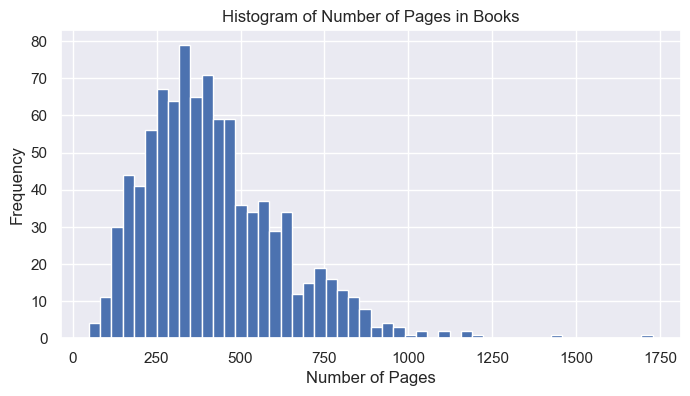

,0,1
0,mean,419.356531
1,median,384.0
2,skewness,positive


In [30]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

# Plot a histogram of the number of pages in books
plt.hist(df['pages'], bins=50)
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages in Books')
plt.show()

# Calculate mean, median, and determine skewness
mean_pages = df['pages'].mean()
median_pages = df['pages'].median()
if(mean_pages > median_pages):
    skewness = 'positive'
elif(mean_pages < median_pages):
    skewness = 'negative'
else:
    skewness = 'symmetric'

q2_result = [('mean', mean_pages), ('median', median_pages), ('skewness', skewness)]
pd.DataFrame(q2_result)

#### Question 3

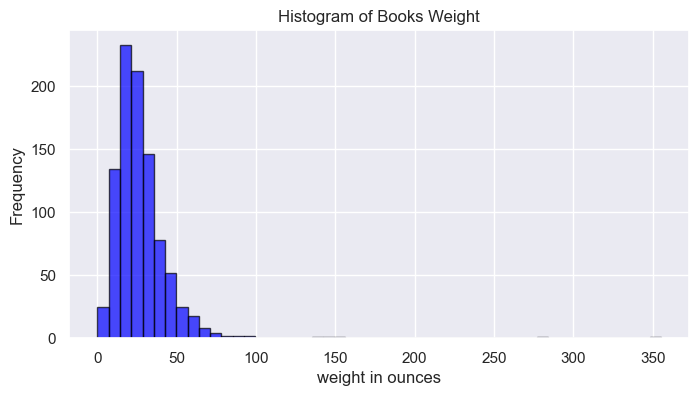

,0,1
0,mean (ounces),27.38
1,median (ounces),23.52
2,skewness,positive


In [31]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

# Inspect the 'weight' column and determine if it contains weights in pounds or ounces
df['is in pounds'] = df['weight'].str.contains(' pounds', na=False)

# Separate books with weights in pounds and ounces
books_in_pounds = df[df['is in pounds'] == True].copy()
books_in_ounces = df[df['is in pounds'] == False].copy()

# Initialize a new column for weight in ounces
df['weight in ounces'] = pd.NA

# Convert weights in pounds to ounces
books_in_pounds.loc[df['is in pounds'] == True, 'weight in ounces'] = (
        df.loc[df['is in pounds'] == True, 'weight'].str.replace(' pounds', '').astype(float) * 16)
books_in_pounds['weight in ounces'] = (
    books_in_pounds['weight in ounces'].fillna(books_in_pounds['weight in ounces'].mean()))

# Convert weights in ounces
books_in_ounces.loc[df['is in pounds'] == False, 'weight in ounces'] = (
    df.loc[df['is in pounds'] == False, 'weight'].str.replace(' ounces', '').astype(float))
books_in_ounces['weight in ounces'] = (
    books_in_ounces['weight in ounces'].fillna(books_in_ounces['weight in ounces'].mean()))

# Combine the results back into the main DataFrame
df['weight in ounces'] = pd.concat([books_in_pounds['weight in ounces'], books_in_ounces['weight in ounces']])
pd.DataFrame(df)

# Plot a histogram of book weights
plt.hist(df['weight in ounces'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('weight in ounces')
plt.ylabel('Frequency')
plt.title('Histogram of Books Weight')
plt.show()

# Calculate mean, median, and determine skewness for weights
mean_pages = df['weight in ounces'].mean().round(2)
median_pages = df['weight in ounces'].median()
if(mean_pages > median_pages):
    skewness = 'positive'
elif(mean_pages < median_pages):
    skewness = 'negative'
else:
    skewness = 'symmetric'

q3_result = [('mean (ounces)', mean_pages), ('median (ounces)', median_pages), ('skewness', skewness)]
pd.DataFrame(q3_result)

#### Question 4

In [32]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

# Compute Pearson's correlation between book volume and price
book_dimensions = df['dimensions'].str.replace(' inches', '').str.split(' x ', expand=True).astype(float)
df['volume'] = book_dimensions[0] * book_dimensions[1] * book_dimensions[2]
df['volume'] = df['volume'].fillna(df['volume'].mean())
df['price'] = df['price'].fillna(df['price'].mean())
q4_result = [('pearson correlation between books volume and price', df['volume'].corr(df['price'])),]

pd.DataFrame(q4_result)




,0,1
0,pearson correlation between books volume and p...,0.41851


#### Question 5

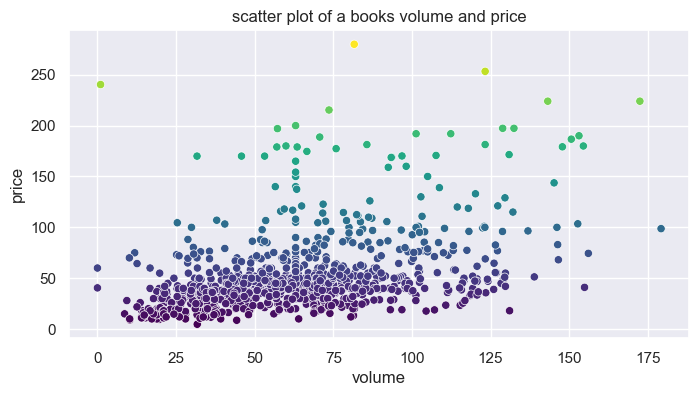

In [33]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

# Plot a scatter plot of book volume and price
sns.scatterplot(x="volume", y="price", data=df, hue="price", palette='viridis', legend=False)
plt.title('scatter plot of a books volume and price')
plt.show()


#### Question 6

In [34]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

# Categorize books based on keyphrases in their titles
title_category = {
    'data science': df['title'].str.contains('data science', case=False).sum(),
    'data analytics': df['title'].str.contains('data analytics', case=False).sum(),
    'data engineering': df['title'].str.contains('data engineering', case=False).sum(),
    'machine learning': df['title'].str.contains('machine learning', case=False).sum(),
    'statistics': df['title'].str.contains('statistics', case=False).sum(),
    'deep learning': df['title'].str.contains('deep learning', case=False).sum(),
    'natural language processing': df['title'].str.contains('natural language processing', case=False).sum(),
}

# Add total count of books in all categories
title_category['total'] = sum(title_category.values())

q5_result = pd.DataFrame(list(title_category.items()), columns=['category', 'number of books'])
pd.DataFrame(q5_result)

,category,number of books
0,data science,111
1,data analytics,28
2,data engineering,7
3,machine learning,179
4,statistics,128
5,deep learning,138
6,natural language processing,13
7,total,604


#### Question 7

In [35]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

# Sort categories by the number of books in descending order
df_categories = q5_result.sort_values(by=['number of books'], ascending=False).reset_index(drop=True)
df_categories = df_categories.drop(df_categories[df_categories['category'] == 'total'].index)
pd.DataFrame(df_categories)

,category,number of books
1,machine learning,179
2,deep learning,138
3,statistics,128
4,data science,111
5,data analytics,28
6,natural language processing,13
7,data engineering,7


#### Question 8

In [36]:
import numpy as np
from statistics import NormalDist

### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

# Sample 10000 values from a normal distribution N~(50, 10)
sample = np.random.normal(50, 10, 10000)
left, right = 42.5, 57.5

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

# Calculate the portion of the distribution in the range (42.5, 57.5) using z-table
z_left = (left - 50) / 10
z_right = (right - 50) / 10
q8_result = pd.DataFrame([('portion according to z table',
    str(round(((NormalDist().cdf(z_right) - NormalDist().cdf(z_left)) * 100), 2)) + "%")],
    columns=['description', 'value'])


### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

# Calculate the portion empirically using the sampled values
empirical_portion = str(round((np.sum((sample > left) & (sample < right)) / len(sample)) * 100, 2)) + "%"
q8_result.loc[len(q8_result)] = ['portion according to empirical calculation', empirical_portion]

pd.DataFrame(q8_result)







,description,value
0,portion according to z table,54.67%
1,portion according to empirical calculation,54.59%


#### Question 9

In [37]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries

# Compute the 90% confidence interval for the true population mean of book prices
mean, std, n = df['price'].mean(), df['price'].std(), len(df)
z = NormalDist().inv_cdf(0.9)
left, right = mean - z * (std / np.sqrt(n)), mean + z * (std / np.sqrt(n))
q9_result = pd.DataFrame([('left boundary', left), ('right boundary', right)], columns=['boundary', 'value'])
pd.DataFrame(q9_result)

,boundary,value
0,left boundary,50.580522
1,right boundary,53.626533


#### Question 10

In [38]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no

# Check if the true population mean of book prices resides within [49.0, 54.0] with 85% confidence
mean, std, n = df['price'].mean(), df['price'].std(), len(df)
z = NormalDist().inv_cdf(0.85)
left, right = mean - z * (std / np.sqrt(n)), mean + z * (std / np.sqrt(n))
answer = 'yes' if (left >= 49.0 and right <= 54.0) else 'no'
q10_result = pd.DataFrame([('left boundary', left), ('right boundary', right), ('answer', answer)], columns=['boundary', 'value'])
pd.DataFrame(q10_result)

,boundary,value
0,left boundary,50.871822
1,right boundary,53.335233
2,answer,yes
